In [1]:
%matplotlib inline
# ---- settings ----
import json
import matplotlib.pyplot as plt
from os.path import isfile
import sys
from time import time
import cv2
import numpy as np
from os.path import join, isdir
from mpl_toolkits.mplot3d import Axes3D
sys.path.insert(0,'../')
sys.path.append('./../../easy_multi_person_pose_estimation')
from mvpose import pose
from poseestimation import model
pe = model.PoseEstimator()
import mvpose.data.transform as tfm

Settings = json.load(open('../settings.txt'))

root = join(Settings['data_root'], 'pak')

from pak.datasets.UMPM import UMPM
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']


X, Y, Calib = tfm.get_from_umpm(root, 'p2_free_1', user, pwd)

# create video
start_frame = 0
skip = 50
total_frames = 10



Using TensorFlow backend.


UMPM


handling frame  0
elapsed: 9.312593698501587
handling frame  50
elapsed: 6.313623666763306
handling frame  100
elapsed: 4.74043345451355
handling frame  150
elapsed: 4.883779287338257


AssertionError: nA=1, nB=-1

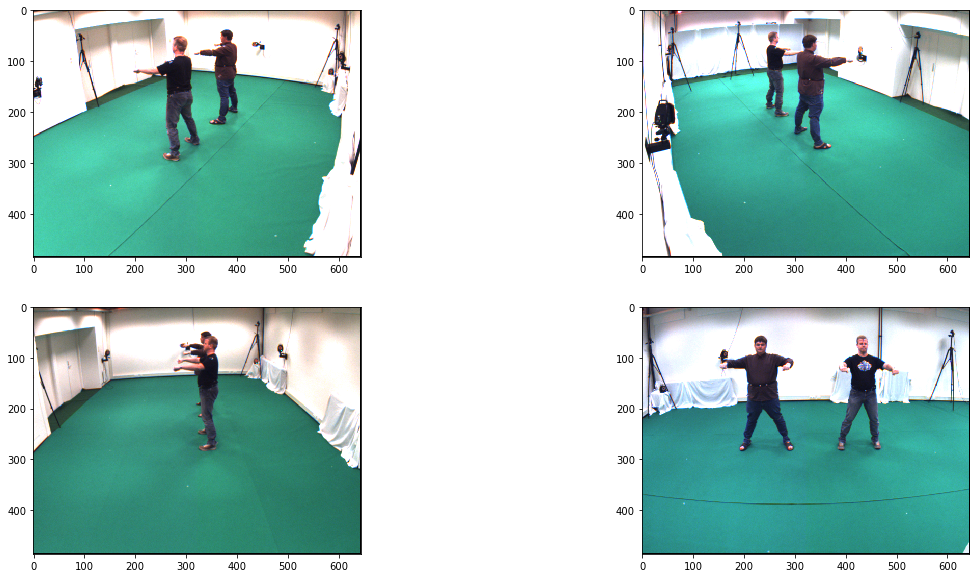

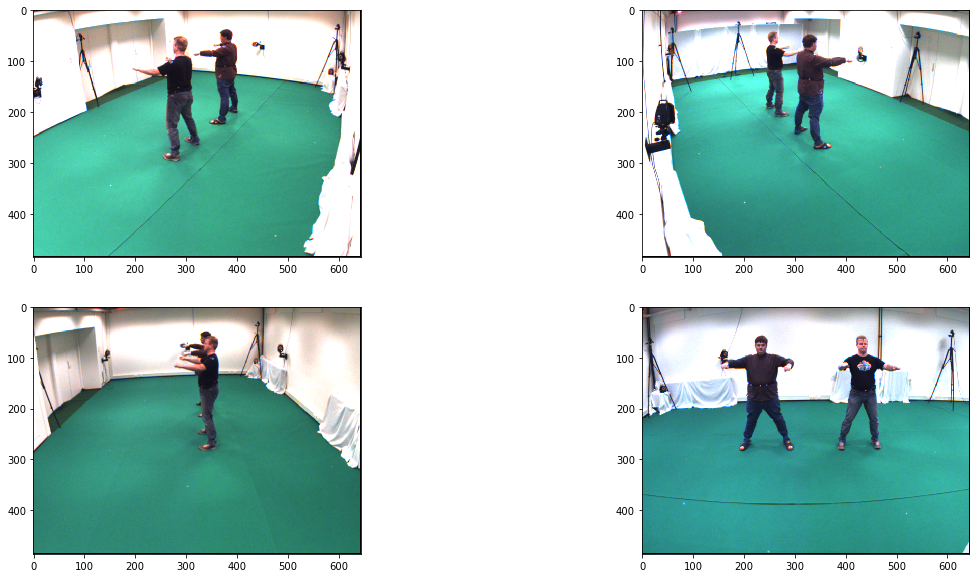

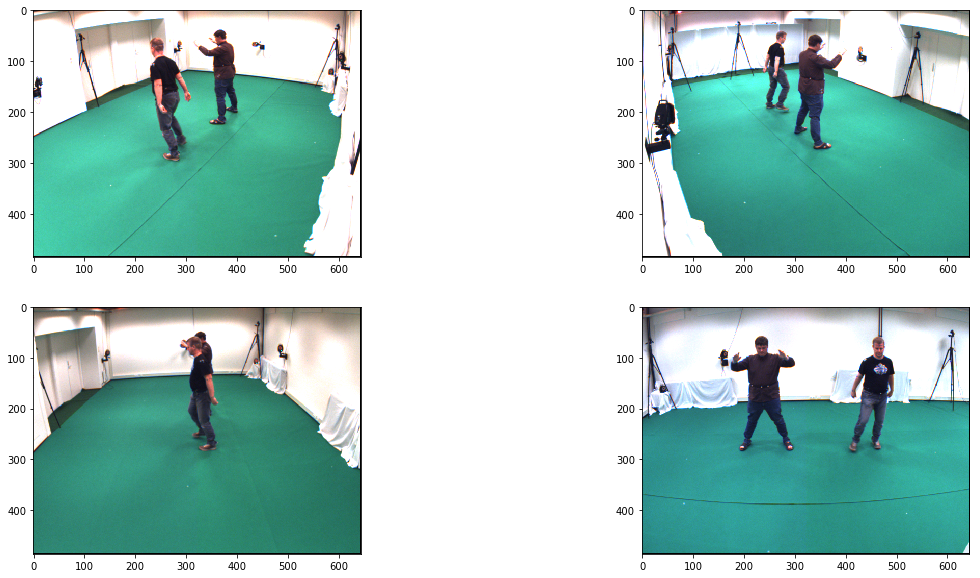

In [2]:
from mvpose.pose import estimate

for f in range(start_frame, (start_frame + total_frames) * skip, skip):
    
    print('handling frame ', f)
    
    Im = np.array([X[0][f], X[1][f], X[2][f], X[3][f]])
    
    _start = time()
    heatmaps, pafs = pe.predict_pafs_and_heatmaps(Im)
    _end = time(); print('elapsed:', _end - _start)
    
    humans = estimate(Calib, heatmaps, pafs)
    
    
    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(221).imshow(Im[0])
    fig.add_subplot(222).imshow(Im[1])
    fig.add_subplot(223).imshow(Im[2])
    fig.add_subplot(224).imshow(Im[3])
    
    
    plt.savefig('frame'+str(f) + '.png', format='png')
    
    